
# ML/Python Course Material
### [Mohamad Dia](http://mohamaddia.me)
Feb 11 2020

# T1: Naive Bayes Classifier - Programming Exercises

### Exercise 1: Bernoulli Naive Bayes for text classification

In this first exercise, you will implement the Bernoulli naive Bayes classifier for the articles classification problem already introduced in the theory part. We believe that implementing this task in python will help reinforce your learning on the first hand, and it will give you the opportunity to practice a bit of python programming.

> Note: Implement the Bernoulli naive Bayes from scratch without using the `sklearn.naive_bayes.BernoulliNB` ready implementation from the scikit-learn library.

The training dataset is provided below. `X_train` contains $10$ feature vectors that correspond to $10$ different newspaper articles. Each feature vector is made of $4$ boolean variables that indicate whether the words "election", "parliament", "player", and "game" are present in the article (as explained in the example introduced in the theory part). The labels are given in `y_train` ($1$ corresponds to "politics" article and $0$ to "sports").

In [1]:
import numpy as np
X_train = np.array([[0,1,0,0], [1,1,0,0], [0,0,0,1], [1,1,0,1], [0,0,1,1], [1,0,0,1], [0,1,1,1], [1,1,1,0], [1,1,1,1], [1,0,0,0]])
y_train = np.array([1 ,1, 0, 1, 0, 0, 0, 1, 1, 1])

In [2]:
print(X_train)
print("The shape of X_train:", X_train.shape)

[[0 1 0 0]
 [1 1 0 0]
 [0 0 0 1]
 [1 1 0 1]
 [0 0 1 1]
 [1 0 0 1]
 [0 1 1 1]
 [1 1 1 0]
 [1 1 1 1]
 [1 0 0 0]]
The shape of X_train: (10, 4)


In [3]:
print(y_train)
print("The shape of y_train:", y_train.shape)

[1 1 0 1 0 0 0 1 1 1]
The shape of y_train: (10,)


Use `y_train` to learn the two class priors.

In [4]:
# training: compute the priors

#### complete the task here

Since our features are boolean, we opt for Bernoulli naive Bayes model. Use `X_train` and `y_train` to learn the parameters of the Bernoulli distributions (the success probabilities).

*Hint: There are $8$ parameters to learn.*

In [5]:
# training: compute the likelihood prarameters

#### complete the task here

Now consider the following test dataset `X_test` which contains two feature vectors. Apply your trained model above to predict the labels of `X_test`.

*Hint: Apply the MAP rule.*

In [6]:
X_test = np.array([[0,1,1,0],[1,0,1,0]])
print(X_test)

[[0 1 1 0]
 [1 0 1 0]]


In [7]:
# prediction/testing

#### complete the task here

### Exercise 2: Gaussian Naive Bayes for Iris Flowers classification

In this exercise, you will implement another variant of naive Bayes classifier which is the Gaussian naive Bayes. The task here is to classify the "Iris flowers" into three different classes: "Setosa Iris', 'Versicolor Iris', 'Virginica Iris' labeled as 0, 1 , 2 respectively. The feature vector is made of four features: the length and the width of the flower's sepals and petals in centimeters. Let's load the data first and have a look into it.

In [8]:
# import the dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
print("The shape of X_train:", X_train.shape)
print("The shape of y_train:", y_train.shape)

The shape of X_train: (100, 4)
The shape of y_train: (100,)


Let's now try to visualize `X_train` and `y_train` using two features out of four.

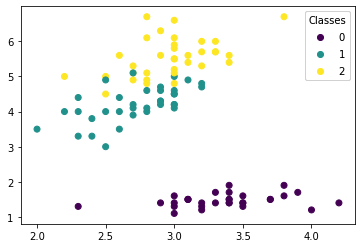

In [10]:
# visualize the training dataset based on two features
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots()
scatter = ax.scatter(X_train[:,1], X_train[:,2], c=y_train)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)

You can clearly see the three classes in the plot above. Moreover, you can notice that the features are continuous (as opposed to discrete boolean features in the previous example). Therefore, we opt for Gaussian naive Bayes since it is natural here to consider that each feature follows a Gaussian distribution with a certain mean and variance

$$P(x_i\mid C_k) = \frac{1}{\sqrt{2 \pi \sigma_{k}^2}} \, e^{-\frac{(x_i-\mu_{ik})^2}{2\sigma_{ik}^2}}.$$

Although we haven't explicitly mentioned how to learn the parameters of the Gaussian parameters, you will see in the following that this is a simple task. Let's first learn the three class priors using `y_train` as we have done before.

In [11]:
# training: compute the priors

#### complete the task here

Now you need to use ``X_train`` and ``y_train`` to learn the parameters of the Gaussian distributions. Note that we have $3$ classes and $4$ features, hence you need to learn $12$ Gaussian distributions (on for each $i$ and $k$). Since each Gaussian distribution is defined by two parameters (the mean $\mu_{ik}$ and the variance $\sigma_{ik}^2$), you need to learn $24$ parameters in total. These parameters are nothing but the statistical means and variances derived from the training dataset (i.e. maximum likelihood estimates) with:

$$\mu_{ik} = \frac{1}{\mid I_k \mid} \sum_{m \in I_k}x_i^m, \quad \sigma_{ik}^2 = \frac{1}{\mid I_k \mid} \sum_{m \in I_k}(x_i^m - \mu_{ik})^2 \quad \text{for} \, i = 1,...,n=4 \, \text{and} \, k = 1,...,K=3$$

where $I_k$ is set of indices in the training dataset of the instances with label $k$. This means that the sum is over the rows in the ``X_train`` (it is not over all the rows, but it is over the rows that have the label $k$). $\mid I_k \mid$ is the number of instances in the training dataset with label $k$.

Implement the two formulas above to learn $\mu_{ik}$ and $\sigma_{ik}^2$ for all the features and all the classes. Note that $\sigma_{ik}^2$ depends on $\mu_{ik}$, hence you need to compute the $\mu$'s first then the $\sigma^2$'s.

*Hint: You need to compute $12$ different means and $12$ different variances.*

> Note: Here you need to learn the parameters of the Gaussian naive Bayes from scratch by implementing the formulas above without using the `sklearn.naive_bayes.GaussianNB` ready implementation from the scikit-learn library. However, if you are familiar with such library, you can use it to check the correctness of your results.

In [12]:
# training: compute the likelihood prarameters

#### complete the task here

Now apply your trained model above to predict the labels of ``X_test`` and compare the results with the ground the true values `y_test`.

*Hint: Apply the MAP rule.*

In [13]:
# prediction/testing

#### complete the task here